In [1]:
!pip install libsvmdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
from libsvmdata import fetch_libsvm
from random import randrange
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#1 Import the data


In [3]:
# Get data from the library
X,y = fetch_libsvm("diabetes_scale")

# Check the first 10 rows
X[:10]

file_sizes: 100%|███████████████████████████| 68.6k/68.6k [00:00<00:00, 178kB/s]


array([[-0.294118  ,  0.487437  ,  0.180328  , -0.292929  , -1.        ,
         0.00149028, -0.53117   , -0.0333333 ],
       [-0.882353  , -0.145729  ,  0.0819672 , -0.414141  , -1.        ,
        -0.207153  , -0.766866  , -0.666667  ],
       [-0.0588235 ,  0.839196  ,  0.0491803 , -1.        , -1.        ,
        -0.305514  , -0.492741  , -0.633333  ],
       [-0.882353  , -0.105528  ,  0.0819672 , -0.535354  , -0.777778  ,
        -0.162444  , -0.923997  , -1.        ],
       [-1.        ,  0.376884  , -0.344262  , -0.292929  , -0.602837  ,
         0.28465   ,  0.887276  , -0.6       ],
       [-0.411765  ,  0.165829  ,  0.213115  , -1.        , -1.        ,
        -0.23696   , -0.894962  , -0.7       ],
       [-0.647059  , -0.21608   , -0.180328  , -0.353535  , -0.791962  ,
        -0.0760059 , -0.854825  , -0.833333  ],
       [ 0.176471  ,  0.155779  , -1.        , -1.        , -1.        ,
         0.052161  , -0.952178  , -0.733333  ],
       [-0.764706  ,  0.979899  

#2 Split the data into training and testing


In [4]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Reshape the y for later operation
y_train = y_train.reshape(1, y_train.shape[0]).T
y_test = y_test.reshape(1, y_test.shape[0]).T

In [5]:
print(np.shape(X_train), np.shape(y_train))

(614, 8) (614, 1)


#3 Define the perceptron model

In [6]:
class Perceptron:
  #constructor
  def __init__ (self, w = None):
    self.w = w

  def predict(self, X):
    output = []
    for x in X:
      prediction = np.sign(np.dot(self.w, x))
      output.append(prediction)
    return output

  def fit(self, X, Y, epochs = 1000, lr = 1):
    self.w = np.ones(X.shape[1])
    accuracy = []
    weight_matrix = []

    for i in range(epochs):
      sum_w = 0
      for x,y in zip(X, Y):
        error = 1 if y*np.dot(self.w,x) < 0 else 0
        sum_w += error*y*x
      self.w = self.w + lr*sum_w
      weight_matrix.append(self.w)
      accuracy.append(accuracy_score(self.predict(X), Y))

    return np.array(weight_matrix), accuracy 

#4 Initial test of the model accuracy


##4.1 Fit the training data into the model to find the optimal weight

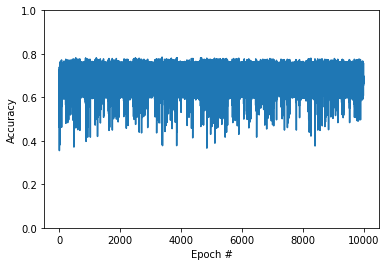

In [7]:
perceptron = Perceptron()

epochs = 10000
learn_rate = 0.3
wt_matrix_1, wt_accuracy = perceptron.fit(X_train, y_train, epochs, learn_rate)

plt.plot(wt_accuracy)
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.show()

In [ ]:
wt_matrix_1

array([[ -73.24118975,   11.71406888,   14.39180437, ...,  -11.38852058,
         -82.95696029,  -80.35000562],
       [ -44.7235355 ,  -14.57135449,    3.43934323, ...,  -14.56825431,
         -44.02075193,  -51.44000471],
       [ -16.20588125,  -40.85677787,   -7.51311791, ...,  -17.74798804,
          -5.08454357,  -22.5300038 ],
       ...,
       [ -12.1777166 , -105.9230981 ,   22.16403652, ...,  -94.35078295,
         -13.43647778,  -24.38676452],
       [ -39.67184015,  -90.3713407 ,   30.99190699, ...,  -93.13200251,
         -48.92460707,  -53.14676693],
       [ -13.0424219 , -107.78189108,   22.43944669, ...,  -95.05048464,
         -14.10308759,  -26.03676641]])

##4.2 Test the accuracy with the current model


In [8]:
#making predictions on test data
Y_pred_test = perceptron.predict(X_test)

#checking the accuracy of the model
print(f"Accuracy:{accuracy_score(Y_pred_test, y_test)}")

Accuracy:0.6428571428571429


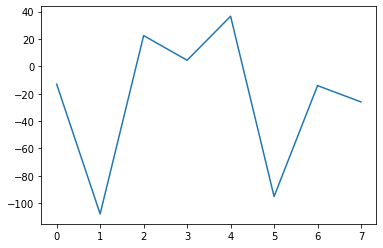

In [9]:
# plot the weight transformation
plt.plot(wt_matrix_1[-1,:])

plt.show()

#5 Experiementation

##5.1 Testing by changing the learn_rate

In [13]:
def loss_calc(prediction, expected):
  sum = 0
  for p,e in zip(prediction,expected):
    sum += max(0, -e*p)
  return sum

In [28]:
epochs = 10000

accuracy_records = []
best_accuracy = 0
best_lr = 0.5
loss = []

for learn_rate in np.arange(0, 1, 0.1):
  wt_matrix_2 = perceptron.fit(X_train, y_train, epochs, learn_rate)
  #making predictions on test data
  Y_pred_test = perceptron.predict(X_test)

  #checking the accuracy of the model
  accuracy = accuracy_score(Y_pred_test, y_test)
  accuracy_records.append(accuracy)
  loss.append(loss_calc(Y_pred_test, y_test))
  print(f"\nAccuracy for epochs = 10000 and learn rate {learn_rate}:{accuracy}")

  if best_accuracy < accuracy:
    best_accuracy = accuracy
    best_lr = learn_rate

print(f"\nBest accuracy when changing learn rate is at {best_lr} and the accuracy is {best_accuracy}")


Accuracy for epochs = 10000 and learn rate 0.0:0.33766233766233766

Accuracy for epochs = 10000 and learn rate 0.1:0.7532467532467533

Accuracy for epochs = 10000 and learn rate 0.2:0.6038961038961039

Accuracy for epochs = 10000 and learn rate 0.30000000000000004:0.6428571428571429

Accuracy for epochs = 10000 and learn rate 0.4:0.6168831168831169

Accuracy for epochs = 10000 and learn rate 0.5:0.6688311688311688

Accuracy for epochs = 10000 and learn rate 0.6000000000000001:0.6688311688311688

Accuracy for epochs = 10000 and learn rate 0.7000000000000001:0.6818181818181818

Accuracy for epochs = 10000 and learn rate 0.8:0.6753246753246753

Accuracy for epochs = 10000 and learn rate 0.9:0.7792207792207793

Best accuracy when changing learn rate is at 0.9 and the accuracy is 0.7792207792207793


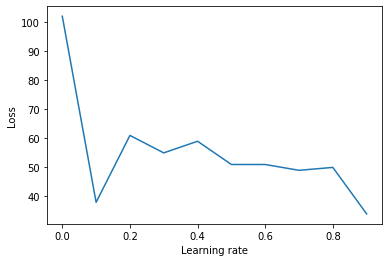

In [29]:
plt.plot(np.arange(0, 1, 0.1), loss)
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.show()

## 5.2 Test by changing the number of iteration (epochs)

Using the optimal learning rate from the previous test we change the number of iteration

In [30]:
learn_rate = 0.9 

accuracy_records = []
best_accuracy = 0
best_epochs = 10000
loss = []

for epochs in range(10000, 15000, 1000):
  wt_matrix_2 = perceptron.fit(X_train, y_train, epochs, learn_rate)
  #making predictions on test data
  Y_pred_test = perceptron.predict(X_test)

  #checking the accuracy of the model
  accuracy = accuracy_score(Y_pred_test, y_test)
  accuracy_records.append(accuracy)
  loss.append(loss_calc(Y_pred_test, y_test))
  print(f"\nAccuracy for epochs = {epochs} and learn rate {learn_rate}:{accuracy}")

  if best_accuracy < accuracy:
    best_accuracy = accuracy
    best_epochs = epochs

print(f"\nBest accuracy when changing iterations(epochs) is at {epochs} and the accuracy is {best_accuracy}")


Accuracy for epochs = 10000 and learn rate 0.9:0.7792207792207793

Accuracy for epochs = 11000 and learn rate 0.9:0.7922077922077922

Accuracy for epochs = 12000 and learn rate 0.9:0.6428571428571429

Accuracy for epochs = 13000 and learn rate 0.9:0.6688311688311688

Accuracy for epochs = 14000 and learn rate 0.9:0.6688311688311688

Best accuracy when changing iterations(epochs) is at 14000 and the accuracy is 0.7922077922077922


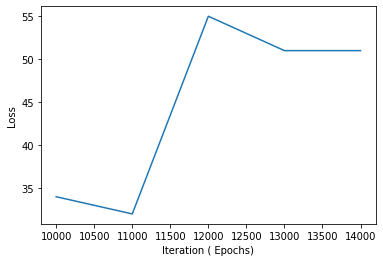

In [32]:
plt.plot(range(10000, 15000, 1000), loss)
plt.xlabel("Iteration ( Epochs)")
plt.ylabel("Loss")
plt.show()

## 5.3 Test using the Scikit-Learn library 

In [21]:
from sklearn.linear_model import Perceptron

Using the results from the 2 previous test we use the optimal iteration and learning rate.

In [34]:
model = Perceptron(eta0=0.9 , max_iter = 10000)
# fit model
model.fit(X, y)

# y_pred = []
# for x in X_test:
y_pred = model.predict(X_test)

print(f"\nAccuracy for epochs = {10000} and learn rate {0.9 }:{accuracy_score(y_pred, y_test)}")



Accuracy for epochs = 10000 and learn rate 0.9:0.6883116883116883


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.665
Config: {'eta0': 1.0}
